In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, RobustScaler

In [2]:
columns = ['unit', 'cycle', 'op_setting1', 'op_setting2', 'op_setting3'] + [f'sensor{i}' for i in range(1,22)]


train1, train2, train3, train4 = [pd.read_csv(f'CMAPSSData/train_FD00{i}.txt', sep=" ", header=None, names=columns) for i in range(1,5)]
test1, test2, test3, test4 = [pd.read_csv(f'CMAPSSData/test_FD00{i}.txt',sep = " ",header = None, names=columns)for i in range(1,5)]


In [3]:
train1.head()

unit   cycle  op_setting1  op_setting2  op_setting3  sensor1  sensor2  \
1 1 -0.0007 -0.0004        100.0       518.67       641.82  1589.70  1400.60   
  2  0.0019 -0.0003        100.0       518.67       642.15  1591.82  1403.14   
  3 -0.0043  0.0003        100.0       518.67       642.35  1587.99  1404.20   
  4  0.0007  0.0000        100.0       518.67       642.35  1582.79  1401.87   
  5 -0.0019 -0.0002        100.0       518.67       642.37  1582.85  1406.22   

     sensor3  sensor4  sensor5  ...  sensor12  sensor13  sensor14  sensor15  \
1 1    14.62    21.61   554.36  ...   8138.62    8.4195      0.03       392   
  2    14.62    21.61   553.75  ...   8131.49    8.4318      0.03       392   
  3    14.62    21.61   554.26  ...   8133.23    8.4178      0.03       390   
  4    14.62    21.61   554.45  ...   8133.83    8.3682      0.03       392   
  5    14.62    21.61   554.00  ...   8133.80    8.4294      0.03       393   

     sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  
1 1      2388     100.0     39.06   23.4190       NaN       NaN  
  2      2388     100.0     39.00   23.4236       NaN       NaN  
  3      2388     100.0     38.95   23.3442       NaN       NaN  
  4      2388     100.0     38.88   23.3739       NaN       NaN  
  5      2388     100.0     38.90   23.4044       NaN       NaN  

[5 rows x 26 columns]

In [4]:
test1.head()

unit   cycle  op_setting1  op_setting2  op_setting3  sensor1  sensor2  \
1 1  0.0023  0.0003        100.0       518.67       643.02  1585.29  1398.21   
  2 -0.0027 -0.0003        100.0       518.67       641.71  1588.45  1395.42   
  3  0.0003  0.0001        100.0       518.67       642.46  1586.94  1401.34   
  4  0.0042  0.0000        100.0       518.67       642.44  1584.12  1406.42   
  5  0.0014  0.0000        100.0       518.67       642.51  1587.19  1401.92   

     sensor3  sensor4  sensor5  ...  sensor12  sensor13  sensor14  sensor15  \
1 1    14.62    21.61   553.90  ...   8125.55    8.4052      0.03       392   
  2    14.62    21.61   554.85  ...   8139.62    8.3803      0.03       393   
  3    14.62    21.61   554.11  ...   8130.10    8.4441      0.03       393   
  4    14.62    21.61   554.07  ...   8132.90    8.3917      0.03       391   
  5    14.62    21.61   554.16  ...   8129.54    8.4031      0.03       390   

     sensor16  sensor17  sensor18  sensor19  sensor20  sensor21  
1 1      2388     100.0     38.86   23.3735       NaN       NaN  
  2      2388     100.0     39.02   23.3916       NaN       NaN  
  3      2388     100.0     39.08   23.4166       NaN       NaN  
  4      2388     100.0     39.00   23.3737       NaN       NaN  
  5      2388     100.0     38.99   23.4130       NaN       NaN  

[5 rows x 26 columns]

In [5]:
[train.drop([train.columns[-1], 'sensor20', 'sensor21'], axis=1, inplace=True) for train in [train1, train2, train3, train4]]
[test.drop([test.columns[-1], 'sensor20', 'sensor21'], axis=1, inplace=True) for test in [test1, test2, test3, test4]]


[None, None, None, None]

In [6]:
train1.shape

(20631, 24)

In [7]:
rul1, rul2, rul3, rul4 = [pd.read_csv(f'CMAPSSData/RUL_FD00{i}.txt',header=None, names = ['RUL']) for i in range(1,5)]

In [8]:
trains = [train1,train2,train3,train4]
tests=[train1,train2,train3,train4]

In [9]:
def analyze_dataset_dimensions(trains, tests):
    for i, (train, test) in enumerate(zip(trains, tests), 1):
        print(f"\nDataset FD00{i}:")
        print(f"Training set shape: {train.shape}")
        print(f"Test set shape: {test.shape}")
        print(f"Number of engines in training: {train['unit'].nunique()}")
        print(f"Number of engines in test: {test['unit'].nunique()}")

In [10]:
def check_missing_values(trains, tests):
    for i, (train, test) in enumerate(zip(trains, tests), 1):
        print(f"\nFD00{i} Missing Values:")
        print("Training set:")
        print(train.isnull().sum()[train.isnull().sum() > 0])
        print("\nTest set:")
        print(test.isnull().sum()[test.isnull().sum() > 0])

In [11]:
def analyze_sensor_statistics(train):
    sensor_cols = [col for col in train.columns if 'sensor' in col]
    stats_df = pd.DataFrame({
        'mean': train[sensor_cols].mean(),
        'std': train[sensor_cols].std(),
        'skew': train[sensor_cols].skew(),
        'kurtosis': train[sensor_cols].kurtosis()
    })
    return stats_df

In [12]:
def plot_cycle_distributions(trains):
    """Plot cycle length distributions"""
    plt.figure(figsize=(15, 5))
    for i, train in enumerate(trains, 1):
        plt.subplot(1, 4, i)
        plt.hist(train.groupby('unit')['cycle'].max(), bins=30)
        plt.title(f'FD00{i} Cycle Distribution')
        plt.xlabel('Number of Cycles')
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

In [13]:
def plot_sensor_degradation(train, unit_id=1):
    sensor_cols = [col for col in train.columns if 'sensor' in col]
    unit_data = train[train['unit'] == unit_id]
    
    plt.figure(figsize=(15, 10))
    for sensor in sensor_cols[:6]:  # Plot first 6 sensors
        plt.plot(unit_data['cycle'], unit_data[sensor], label=sensor)
    plt.xlabel('Cycle')
    plt.ylabel('Sensor Reading')
    plt.title(f'Sensor Readings Over Time (Unit {unit_id})')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
def analyze_operational_conditions(trains):
    for i, train in enumerate(trains, 1):
        print(f"\nFD00{i} Operating Settings Range:")
        print(train[['op_setting1', 'op_setting2', 'op_setting3']].agg(['min', 'max']))

def analyze_cycle_lengths(trains):
    for i, train in enumerate(trains, 1):
        cycle_stats = train.groupby('unit')['cycle'].max().describe()
        print(f"\nFD00{i} Cycle Statistics:")
        print(cycle_stats)

In [15]:
analyze_dataset_dimensions(trains,tests)


Dataset FD001:
Training set shape: (20631, 24)
Test set shape: (20631, 24)
Number of engines in training: 158
Number of engines in test: 158

Dataset FD002:
Training set shape: (53759, 24)
Test set shape: (53759, 24)
Number of engines in training: 536
Number of engines in test: 536

Dataset FD003:
Training set shape: (24720, 24)
Test set shape: (24720, 24)
Number of engines in training: 160
Number of engines in test: 160

Dataset FD004:
Training set shape: (61249, 24)
Test set shape: (61249, 24)
Number of engines in training: 536
Number of engines in test: 536


In [16]:
check_missing_values(trains,tests)


FD001 Missing Values:
Training set:
Series([], dtype: int64)

Test set:
Series([], dtype: int64)

FD002 Missing Values:
Training set:
Series([], dtype: int64)

Test set:
Series([], dtype: int64)

FD003 Missing Values:
Training set:
Series([], dtype: int64)

Test set:
Series([], dtype: int64)

FD004 Missing Values:
Training set:
Series([], dtype: int64)

Test set:
Series([], dtype: int64)


In [17]:
analyze_sensor_statistics(trains[0])

,mean,std,skew,kurtosis
sensor1,1590.523119,6.131150e+00,0.308946,0.007762
sensor2,1408.933782,9.000605e+00,0.443194,-0.163681
sensor3,14.620000,1.776400e-15,0.000000,0.000000
sensor4,21.609803,1.388985e-03,-6.916813,45.846746
sensor5,553.367711,8.850923e-01,-0.394329,-0.157949
sensor6,2388.096652,7.098548e-02,0.479411,0.333149
sensor7,9065.242941,2.208288e+01,2.555365,9.378681
sensor8,1.300000,0.000000e+00,0.000000,0.000000
sensor9,47.541168,2.670874e-01,0.469329,-0.172192
sensor10,521.413470,7.375534e-01,-0.442407,-0.144917


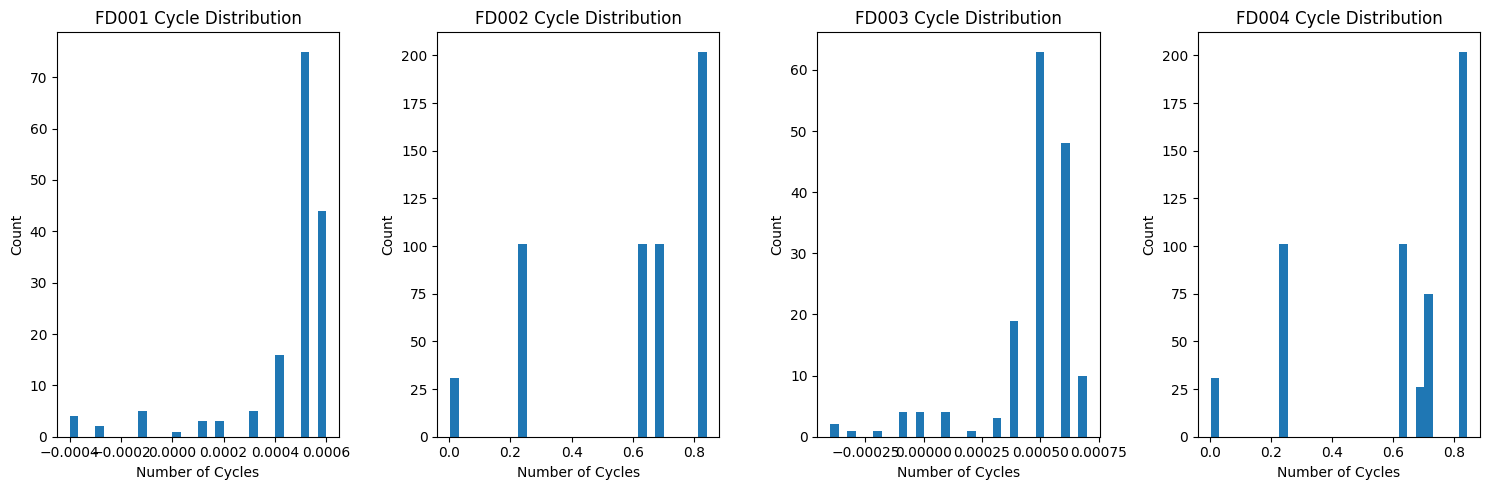

In [18]:
plot_cycle_distributions(trains)


In [19]:
analyze_operational_conditions(trains)


FD001 Operating Settings Range:
     op_setting1  op_setting2  op_setting3
min        100.0       518.67       641.21
max        100.0       518.67       644.53

FD002 Operating Settings Range:
     op_setting1  op_setting2  op_setting3
min         60.0       445.00       535.53
max        100.0       518.67       644.52

FD003 Operating Settings Range:
     op_setting1  op_setting2  op_setting3
min        100.0       518.67       640.84
max        100.0       518.67       645.11

FD004 Operating Settings Range:
     op_setting1  op_setting2  op_setting3
min         60.0       445.00       535.48
max        100.0       518.67       644.42


In [20]:
analyze_cycle_lengths(trains)


FD001 Cycle Statistics:
count    158.000000
mean       0.000443
std        0.000220
min       -0.000400
25%        0.000500
50%        0.000500
75%        0.000600
max        0.000600
Name: cycle, dtype: float64

FD002 Cycle Statistics:
count    536.000000
mean       0.614368
std        0.259890
min        0.002000
25%        0.621700
50%        0.702000
75%        0.842000
max        0.842000
Name: cycle, dtype: float64

FD003 Cycle Statistics:
count    160.000000
mean       0.000467
std        0.000209
min       -0.000400
25%        0.000500
50%        0.000500
75%        0.000600
max        0.000700
Name: cycle, dtype: float64

FD004 Cycle Statistics:
count    536.000000
mean       0.614378
std        0.259891
min        0.001900
25%        0.621900
50%        0.702000
75%        0.842000
max        0.842000
Name: cycle, dtype: float64


In [21]:
def handle_missing_data(trains, tests):
    processed_trains = []
    processed_tests = []
    
    for train, test in zip(trains, tests):
        # Handle missing values
        train = train.interpolate(method='linear', limit_direction='both')
        test = test.interpolate(method='linear', limit_direction='both')
        
        # Forward fill any remaining missing values within each unit
        train = train.groupby('unit').ffill().fillna(0)
        test = test.groupby('unit').ffill().fillna(0)
        
        processed_trains.append(train)
        processed_tests.append(test)
    
    return processed_trains, processed_tests

In [22]:
processed_trains = []
processed_tests = []
for train,test in zip(trains,tests):
    train = train.interpolate(method='linear', limit_direction='both')
    test = test.interpolate(method='linear', limit_direction='both')
    train = train.groupby('unit').ffill().fillna(0)
    test = test.groupby('unit').ffill().fillna(0)
    processed_trains.append(train)
    processed_tests.append(test)

In [23]:
def remove_outliers():
    #i suggest we remove it with a method probably like Z-score
    return True

In [24]:
scalers = []
for train, test in zip(trains, tests):
    cols_to_normalize = [col for col in train.columns if col not in ['unit', 'cycle']]
    scaler = RobustScaler()  
    train_normalized = train.copy()
    train_normalized[cols_to_normalize] = scaler.fit_transform(train[cols_to_normalize])
    test_normalized = test.copy()
    test_normalized[cols_to_normalize] = scaler.transform(test[cols_to_normalize])
        
    processed_trains.append(train_normalized)
    processed_tests.append(test_normalized)
    scalers.append(scaler)

In [30]:
#feature engineering

sc = StandardScaler()

for train in trains:
    train.iloc[:, 1:] = sc.fit_transform(train.iloc[:,1:])

for test in tests:
    test.iloc[:, 1:] = sc.transform(test.iloc[:, 1:])

#dimensionality reduction

       unit     cycle  op_setting1  op_setting2  op_setting3    sensor1  \
1 1 -0.0007 -6.257787    -6.597856   -17.887404   -15.562542 -13.356640   
  2  0.0019 -5.159519    -6.597856   -17.887404   -15.544870 -13.353383   
  3 -0.0043  1.430089    -6.597856   -17.887404   -15.534159 -13.359268   
  4  0.0007 -1.864715    -6.597856   -17.887404   -15.534159 -13.367256   
  5 -0.0019 -4.061251    -6.597856   -17.887404   -15.533088 -13.367164   

       sensor2  sensor3   sensor4   sensor5  ...  sensor10   sensor11  \
1 1 -10.080243 -2.21694 -2.102835 -1.921360  ... -1.923782 -18.217976   
  2 -10.077878 -2.21694 -2.102835 -1.926053  ... -1.917711 -18.212553   
  3 -10.076891 -2.21694 -2.102835 -1.922129  ... -1.916340 -18.216892   
  4 -10.079061 -2.21694 -2.102835 -1.920668  ... -1.912032 -18.211468   
  5 -10.075010 -2.21694 -2.102835 -1.924130  ... -1.918592 -18.215807   

      sensor12   sensor13  sensor14   sensor15   sensor16   sensor17  \
1 1 -94.176439 -13.179433 -4.963524 -1